In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

In [2]:
# Importing the dataset
path_to_data = "/Users/VincentAssoun/Desktop/Zoetis/"
nrows_for_data = None
pd.set_option('display.max_columns', 100) #This command allows me to see every column, not just 10 of them

In [3]:
sales_16 = pd.read_csv(path_to_data+"sales16.csv",sep=',', nrows=nrows_for_data, encoding = 'latin-1')
sales_16_groupby = sales_16.copy()
sales_16.head()

/Users/VincentAssoun/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SellerNARC,OrderChannel,BuyerSTNARC,Transaction_Date,Transaction_Year,Transaction_YearMonth,Transaction_YearMonthDay,ProdSpecies,Therapeutic,Brand,ProdID,ProdName,NetUnits,NetAmnt,ListAmnt
0,1,DRCT,10073,2016-11-17 00:00:00,2016,201611,20161117,Small Animal,Parasiticides,Revolution-Canine,155,Revolution Puppy Kitten,10.0,253.50,298.50
1,1,DRCT,10073,2016-11-21 00:00:00,2016,201611,20161121,Small Animal,Pain,Rimadyl,047,Rimadyl Chewable,1.0,57.99,57.99
2,1,DRCT,10073,2016-11-22 00:00:00,2016,201611,20161122,Small Animal,Parasiticides,Simparica,115,Simparica,10.0,312.20,473.00
3,1,DRCT,10073,2016-11-28 00:00:00,2016,201611,20161128,Small Animal,Anti-Infectives,Convenia,167,Convenia,1.0,201.15,268.20
4,1,DRCT,10073,2016-11-28 00:00:00,2016,201611,20161128,Small Animal,Biologicals,Three Year Rabies,016,Defensor 3,50.0,37.50,127.50


In [4]:
sales_16.describe()

,SellerNARC,Transaction_Year,Transaction_YearMonth,Transaction_YearMonthDay,NetUnits,NetAmnt,ListAmnt
count,7.509782e+06,7509782.0,7.509782e+06,7.509782e+06,7.509782e+06,7.509782e+06,7.509782e+06
mean,1.565425e+05,2016.0,2.016066e+05,2.016067e+07,2.513789e+01,6.592671e+02,7.235854e+02
std,1.596553e+05,0.0,3.398099e+00,3.399985e+02,8.248337e+02,5.920179e+03,1.127476e+04
min,1.000000e+00,2016.0,2.016010e+05,2.016010e+07,-2.162500e+04,-1.781700e+06,-4.618000e+05
25%,1.000000e+00,2016.0,2.016040e+05,2.016041e+07,1.000000e+00,6.750000e+01,7.013000e+01
50%,4.883000e+04,2016.0,2.016070e+05,2.016070e+07,3.000000e+00,1.617000e+02,1.620000e+02
75%,3.331820e+05,2016.0,2.016100e+05,2.016100e+07,1.200000e+01,3.695000e+02,3.994500e+02
max,5.961830e+05,2016.0,2.016120e+05,2.016123e+07,1.187800e+06,2.826676e+06,2.013312e+07


** Quick analysis **
-  7.5e6 rows in our dataset sales_16
-  mean(SellerNARC) = 1.5e5 ==> Several types of sellers  <font color=blue> * Where do SellerNARC numbers come from?* </font>
-  mean(Transaction_Year) = 2016 ==> This was expected as we look at sales_16 data
-  mean(NetUnits) = 25 ==> Average number of units bought = 25
-  mean(NetAmnt) = 659 ==> Average amount bought after discount = $659 
-  mean(ListAmnt) = 723 ==> Average amount bought before discount = $723
-  <font color=blue> BuyerSTNARC = 0 ? 	</font>

Number of different sellers: 1742
1         2197900
333182    1840566
287672     819576
20457      457937
48830      448713
20468      264686
406893     115530
332928      83887
465440      69778
115583      52789
291438      49198
37546       48025
303391      42341
50003       33080
22141       32574
41772       22390
275076      22058
23589       21688
60508       21303
44414       18863
Name: SellerNARC, dtype: int64


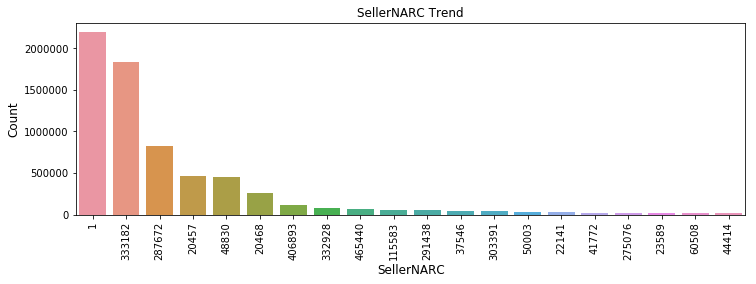

In [5]:
#SellerNARC Trend
sellers_count = sales_16['SellerNARC'].value_counts()
print("Number of different sellers: " + str(len(sellers_count)))
sellers_count = sellers_count[:20]
print(sellers_count)
plt.figure(figsize=(12,12))
plt.subplot(311)
sns.barplot(sellers_count.index, sellers_count.values, order = sellers_count.index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('SellerNARC', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("SellerNARC Trend", fontsize=12)
plt.show()

** Let's focus on the column 'OrderChannel' **

Distribution of the OrderChannel
INDR    5311882
DRCT    1293896
ECOM     610179
IORD     293825
Name: OrderChannel, dtype: int64

Frequency for each channel
INDR    0.707328
DRCT    0.172295
ECOM    0.081251
IORD    0.039126
Name: OrderChannel, dtype: float64


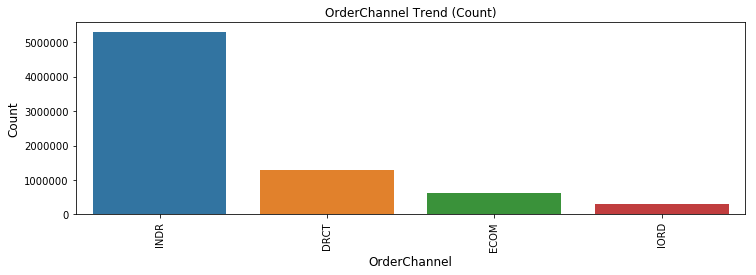

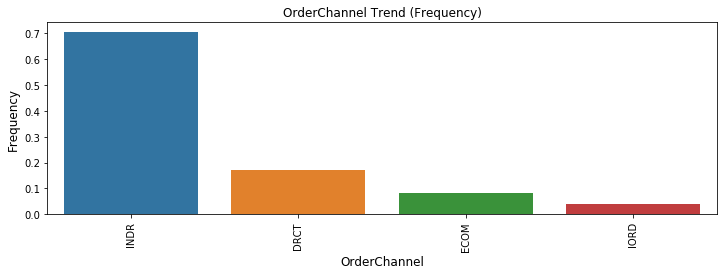

In [6]:
#OrderChannel Trend
channels_count = sales_16['OrderChannel'].value_counts()
channels_freq = sales_16['OrderChannel'].value_counts(normalize = True)

print("Distribution of the OrderChannel")
print(channels_count)
print()
print("Frequency for each channel")
print(channels_freq)

plt.figure(figsize=(12,12))
plt.subplot(311)
sns.barplot(channels_count.index, channels_count.values, order = channels_count.index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('OrderChannel', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("OrderChannel Trend (Count)", fontsize=12)
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(311)
sns.barplot(channels_freq.index, channels_freq.values, order = channels_freq.index)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('OrderChannel', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("OrderChannel Trend (Frequency)", fontsize=12)
plt.show()

The most represented channel is the Indirect Channel <br>
-  INDR: 70%
-  DRCT: 17%
-  ECOM: 8%
-  IORD: 4%

Let's take care of the categorical data OrderChannel

In [7]:
sales_16_onehot = sales_16.copy()
sales_16_onehot = pd.get_dummies(sales_16_onehot, columns=['OrderChannel'])
sales_16_onehot.head()

,SellerNARC,BuyerSTNARC,Transaction_Date,Transaction_Year,Transaction_YearMonth,Transaction_YearMonthDay,ProdSpecies,Therapeutic,Brand,ProdID,ProdName,NetUnits,NetAmnt,ListAmnt,OrderChannel_DRCT,OrderChannel_ECOM,OrderChannel_INDR,OrderChannel_IORD
0,1,10073,2016-11-17 00:00:00,2016,201611,20161117,Small Animal,Parasiticides,Revolution-Canine,155,Revolution Puppy Kitten,10.0,253.50,298.50,1,0,0,0
1,1,10073,2016-11-21 00:00:00,2016,201611,20161121,Small Animal,Pain,Rimadyl,047,Rimadyl Chewable,1.0,57.99,57.99,1,0,0,0
2,1,10073,2016-11-22 00:00:00,2016,201611,20161122,Small Animal,Parasiticides,Simparica,115,Simparica,10.0,312.20,473.00,1,0,0,0
3,1,10073,2016-11-28 00:00:00,2016,201611,20161128,Small Animal,Anti-Infectives,Convenia,167,Convenia,1.0,201.15,268.20,1,0,0,0
4,1,10073,2016-11-28 00:00:00,2016,201611,20161128,Small Animal,Biologicals,Three Year Rabies,016,Defensor 3,50.0,37.50,127.50,1,0,0,0


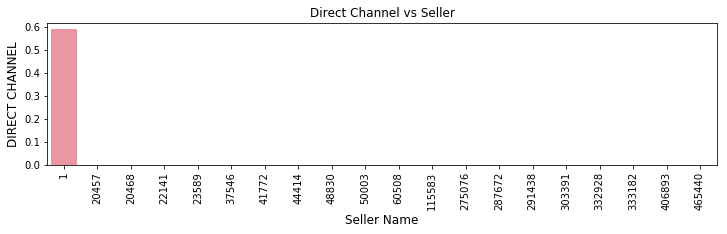

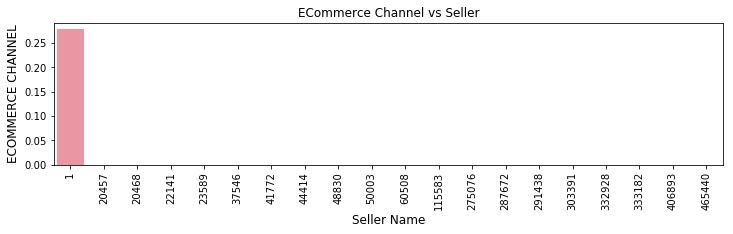

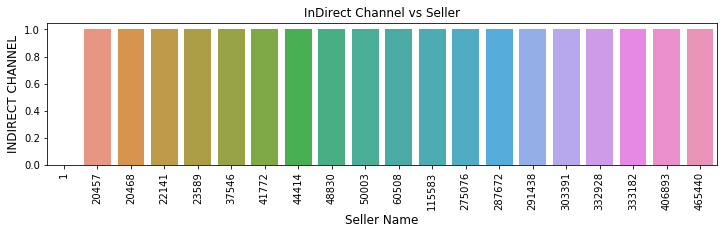

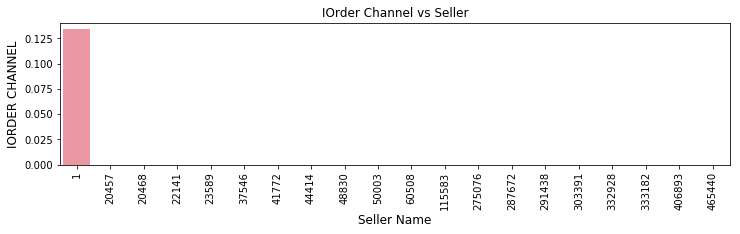

In [8]:
direct = []
ecommerce = []
indirect = []
iorder =[]
seller = []
for c in range(len(sellers_count)):
    current = sales_16_onehot.loc[sales_16_onehot['SellerNARC']==sellers_count.index[c]]['OrderChannel_DRCT'].mean()
    current1 = sales_16_onehot.loc[sales_16_onehot['SellerNARC']==sellers_count.index[c]]['OrderChannel_ECOM'].mean()
    current2 = sales_16_onehot.loc[sales_16_onehot['SellerNARC']==sellers_count.index[c]]['OrderChannel_INDR'].mean()
    current3 = sales_16_onehot.loc[sales_16_onehot['SellerNARC']==sellers_count.index[c]]['OrderChannel_IORD'].mean()

    direct.append(current)
    ecommerce.append(current1)
    indirect.append(current2)
    iorder.append(current3)
    seller.append(sellers_count.index[c])
    
plt.figure(figsize=(12,12)) 
plt.subplot(413)
sns.barplot(seller, direct)
plt.ylabel('DIRECT CHANNEL', fontsize=12)
plt.xlabel('Seller Name', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Direct Channel vs Seller", fontsize=12)
plt.show()

plt.figure(figsize=(12,12)) 
plt.subplot(413)
sns.barplot(seller, ecommerce)
plt.ylabel('ECOMMERCE CHANNEL', fontsize=12)
plt.xlabel('Seller Name', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("ECommerce Channel vs Seller", fontsize=12)
plt.show()

plt.figure(figsize=(12,12)) 
plt.subplot(413)
sns.barplot(seller, indirect)
plt.ylabel('INDIRECT CHANNEL', fontsize=12)
plt.xlabel('Seller Name', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("InDirect Channel vs Seller", fontsize=12)
plt.show()

plt.figure(figsize=(12,12)) 
plt.subplot(413)
sns.barplot(seller, iorder)
plt.ylabel('IORDER CHANNEL', fontsize=12)
plt.xlabel('Seller Name', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("IOrder Channel vs Seller", fontsize=12)
plt.show()

Here we understand that only Zoetis (SellerNARC = 1) is not an Indirect Channel ==> It makes sense <br>
So, let's plot the distribution of the OrderChannel for Zoetis (SellerNARC = 1)

[0.58869648300650623, 0.27761909095045273, 0.0, 0.13368442604304109]


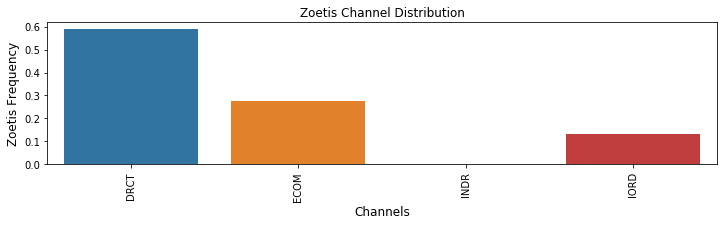

In [9]:
zoetis_channels = []
channels = ['DRCT', 'ECOM', 'INDR', 'IORD']
zoetis_dir = sales_16_onehot.loc[sales_16_onehot['SellerNARC']==1]['OrderChannel_DRCT'].mean()
zoetis_ecom = sales_16_onehot.loc[sales_16_onehot['SellerNARC']==1]['OrderChannel_ECOM'].mean()
zoetis_indr = sales_16_onehot.loc[sales_16_onehot['SellerNARC']==1]['OrderChannel_INDR'].mean()
zoetis_iord = sales_16_onehot.loc[sales_16_onehot['SellerNARC']==1]['OrderChannel_IORD'].mean()
zoetis_channels.append(zoetis_dir)
zoetis_channels.append(zoetis_ecom)
zoetis_channels.append(zoetis_indr)
zoetis_channels.append(zoetis_iord)

print(zoetis_channels)

plt.figure(figsize=(12,12)) 
plt.subplot(413)
sns.barplot(channels, zoetis_channels)
plt.ylabel('Zoetis Frequency', fontsize=12)
plt.xlabel('Channels', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Zoetis Channel Distribution", fontsize=12)
plt.show()

Zoetis Channel Distribution (30% of Total Sales)
-  59% of Direct Channel
-  28% of Ecommerce Channel
-  14% of Iorder Channel

The other 70% are Indirect Channel (not Zoetis)

** Let's focus on Sales Time: When do customers buy products? ** <br>
First, on which month?

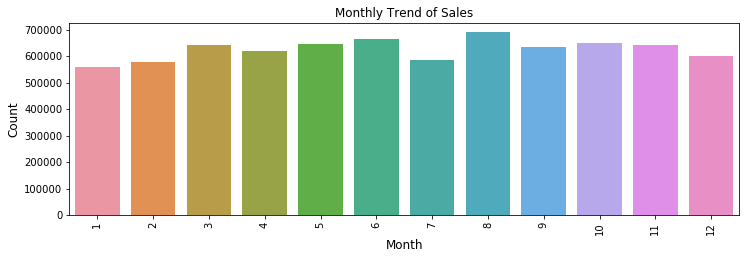

In [10]:
#Sales time trend / Month
sales_16['Transaction_YearMonth'] = pd.DatetimeIndex(sales_16['Transaction_Date']).month
month_count = sales_16['Transaction_YearMonth'].value_counts()

plt.figure(figsize=(12,12))
plt.subplot(311)
month_order = sales_16['Transaction_YearMonth'].unique()
month_order=sorted(month_order, key=lambda x: str(x))
month_order = sorted(month_order, key=lambda x: float(x))
sns.barplot(month_count.index, month_count.values,order=month_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Monthly Trend of Sales", fontsize=12)
plt.show()

Then, is there a day of the month which is more prolific?

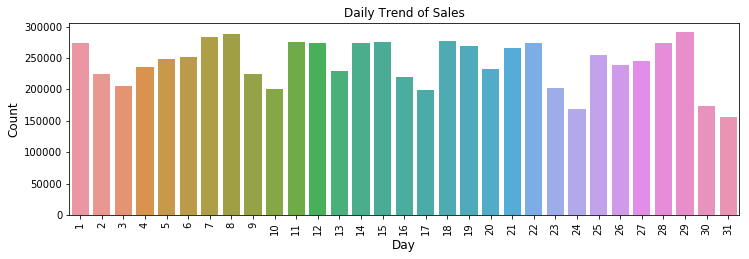

ADD PER WEEKDAY


In [11]:
#Sales time trend / Day
sales_16['Transaction_YearMonthDay'] = pd.DatetimeIndex(sales_16['Transaction_Date']).day
day_count = sales_16['Transaction_YearMonthDay'].value_counts()

plt.figure(figsize=(12,12))
plt.subplot(311)
day_order = sales_16['Transaction_YearMonthDay'].unique()
day_order=sorted(day_order, key=lambda x: str(x))
day_order = sorted(day_order, key=lambda x: float(x))
sns.barplot(day_count.index, day_count.values,order=day_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Daily Trend of Sales", fontsize=12)
plt.show()

print("ADD PER WEEKDAY")

** Let's focus on ProdSpecies **

Distribution of the ProdSpecies
Small Animal                  4220609
Cattle                        1429211
Small Animal Equine Cattle     337548
Cattle Pork                    298426
Equine                         287048
Small Animal Equine            221537
Cattle Pork Equine             163851
Cattle Equine                  130968
Pork                           125814
Diagnostics                    116604
Cattle Pork Poultry             51963
Cattle Poultry                  45108
Cattle Pork Equine Poultry      39948
Poultry                         22774
Poultry Pork                    14689
Unspecified                      3246
Diagnostics Poultry               438
Name: ProdSpecies, dtype: int64

Frequency for each channel
Small Animal                  0.562015
Cattle                        0.190313
Small Animal Equine Cattle    0.044948
Cattle Pork                   0.039738
Equine                        0.038223
Small Animal Equine           0.029500
Cattle Pork Equine          

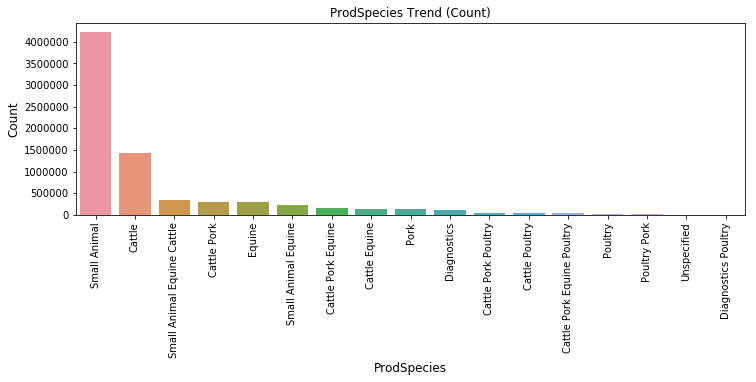

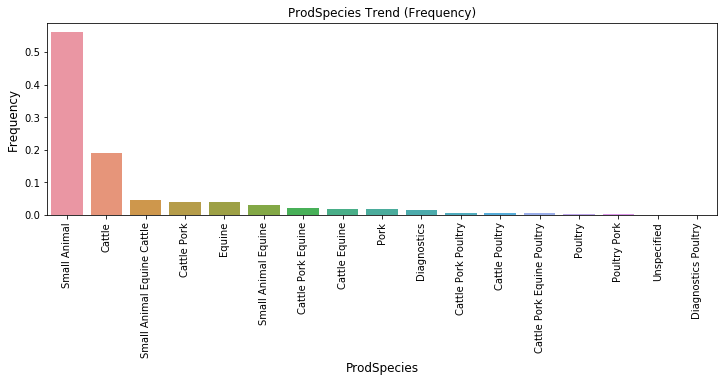

In [12]:
#ProdSpecies Trend
prod_count = sales_16['ProdSpecies'].value_counts()
prod_freq = sales_16['ProdSpecies'].value_counts(normalize = True)

print("Distribution of the ProdSpecies")
print(prod_count)
print()
print("Frequency for each channel")
print(prod_freq)

plt.figure(figsize=(12,12))
plt.subplot(311)
sns.barplot(prod_count.index, prod_count.values, order = prod_count.index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('ProdSpecies', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("ProdSpecies Trend (Count)", fontsize=12)
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(311)
sns.barplot(prod_freq.index, prod_freq.values, order = prod_freq.index)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('ProdSpecies', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("ProdSpecies Trend (Frequency)", fontsize=12)
plt.show()

Here is the distribution of the product species:
-  Small Animal 56%
-  Cattle  19%
-  Small Animal Equine Cattle  4%
-  Cattle Pork   4%
-  Equine  4%
-  Small Animal Equine  3%
-  Cattle Pork Equine  2%
-  Cattle Equine 2%
-  Pork  2%
-  Diagnostics  2%
-  Cattle Pork Poultry <1%
-  Cattle Poultry <1%
-  Cattle Pork Equine Poultry <1%
-  Poultry <1%
-  Poultry Pork <1%
-  Unspecified <1%
-  Diagnostics Poultry <1%

Let's take care of the categorical data 

In [13]:
sales_16_onehot = pd.get_dummies(sales_16_onehot, columns=['ProdSpecies'])

In [14]:
sales_16_onehot.head()

,SellerNARC,BuyerSTNARC,Transaction_Date,Transaction_Year,Transaction_YearMonth,Transaction_YearMonthDay,Therapeutic,Brand,ProdID,ProdName,NetUnits,NetAmnt,ListAmnt,OrderChannel_DRCT,OrderChannel_ECOM,OrderChannel_INDR,OrderChannel_IORD,ProdSpecies_Cattle,ProdSpecies_Cattle Equine,ProdSpecies_Cattle Pork,ProdSpecies_Cattle Pork Equine,ProdSpecies_Cattle Pork Equine Poultry,ProdSpecies_Cattle Pork Poultry,ProdSpecies_Cattle Poultry,ProdSpecies_Diagnostics,ProdSpecies_Diagnostics Poultry,ProdSpecies_Equine,ProdSpecies_Pork,ProdSpecies_Poultry,ProdSpecies_Poultry Pork,ProdSpecies_Small Animal,ProdSpecies_Small Animal Equine,ProdSpecies_Small Animal Equine Cattle,ProdSpecies_Unspecified
0,1,10073,2016-11-17 00:00:00,2016,201611,20161117,Parasiticides,Revolution-Canine,155,Revolution Puppy Kitten,10.0,253.50,298.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,10073,2016-11-21 00:00:00,2016,201611,20161121,Pain,Rimadyl,047,Rimadyl Chewable,1.0,57.99,57.99,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,10073,2016-11-22 00:00:00,2016,201611,20161122,Parasiticides,Simparica,115,Simparica,10.0,312.20,473.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,10073,2016-11-28 00:00:00,2016,201611,20161128,Anti-Infectives,Convenia,167,Convenia,1.0,201.15,268.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,10073,2016-11-28 00:00:00,2016,201611,20161128,Biologicals,Three Year Rabies,016,Defensor 3,50.0,37.50,127.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Now, let's see how each product is ordered in terms of channel:

In [15]:
for p in range(len(prod_count)):
    product = []
    product_name = prod_count.index[p]
    for c in range(len(channels)):
        current = sales_16_onehot.loc[sales_16_onehot['ProdSpecies_' + str(product_name)]==1]['OrderChannel_'+ channels[c]].mean()
        product.append(current)
    
    plt.figure(figsize=(12,12)) 
    plt.subplot(413)
    sns.barplot(channels, product)
    plt.ylabel('Product Frequency', fontsize=12)
    plt.xlabel('Channel', fontsize=12)
    plt.xticks(rotation='vertical')
    plt.title("Channels for ProdSpecies = " + str(product_name), fontsize=12)
    plt.show()

KeyboardInterrupt: 

** Let's focus on Therapeutic ** <br>
This is gonna be the exact same methodology as for ProdSpecies

In [ ]:
#Therapeutic Trend
therapeutic_count = sales_16['Therapeutic'].value_counts()
therapeutic_freq = sales_16['Therapeutic'].value_counts(normalize = True)

print("Distribution of the Therapeutic")
print(therapeutic_count)
print()
print("Frequency for each channel")
print(therapeutic_freq)

plt.figure(figsize=(12,12))
plt.subplot(311)
sns.barplot(therapeutic_count.index, therapeutic_count.values, order = therapeutic_count.index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Therapeutic', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Therapeutic Trend (Count)", fontsize=12)
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(311)
sns.barplot(therapeutic_freq.index, therapeutic_freq.values, order = therapeutic_freq.index)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Therapeutic', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Therapeutic Trend (Frequency)", fontsize=12)
plt.show()

Let's take care of the categorical data 

In [ ]:
sales_16_onehot = pd.get_dummies(sales_16_onehot, columns=['Therapeutic'])

In [ ]:
sales_16_onehot.head()

Now, let's see how each therapeutic category is ordered in terms of channel:

In [ ]:
for t in range(len(therapeutic_count)):
    therapeutic = []
    therapeutic_name = therapeutic_count.index[t]
    for c in range(len(channels)):
        current = sales_16_onehot.loc[sales_16_onehot['Therapeutic_' + str(therapeutic_name)]==1]['OrderChannel_'+ channels[c]].mean()
        therapeutic.append(current)
    
    plt.subplot(413)
    sns.barplot(channels, therapeutic)
    plt.ylabel('Therapeutic', fontsize=12)
    plt.xlabel('Channels', fontsize=12)
    plt.xticks(rotation='vertical')
    plt.title("Channels for Therapeutic = " + str(therapeutic_name), fontsize=12)
    plt.show()

** Let's focus on Channel Performance ** <br>
First, we can try to see how many units & how much money each channel generates

In [ ]:
units_channels = []
units_dir = sales_16_onehot.loc[sales_16_onehot['OrderChannel_DRCT']==1]['NetUnits'].mean()
units_ecom = sales_16_onehot.loc[sales_16_onehot['OrderChannel_ECOM']==1]['NetUnits'].mean()
units_indr = sales_16_onehot.loc[sales_16_onehot['OrderChannel_INDR']==1]['NetUnits'].mean()
units_iord = sales_16_onehot.loc[sales_16_onehot['OrderChannel_IORD']==1]['NetUnits'].mean()
units_channels.append(units_dir)
units_channels.append(units_ecom)
units_channels.append(units_indr)
units_channels.append(units_iord)

print(units_channels)

plt.figure(figsize=(12,12)) 
plt.subplot(413)
sns.barplot(channels, units_channels)
plt.ylabel('Average Units', fontsize=12)
plt.xlabel('Channels', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Average Units per Channel", fontsize=12)
plt.show()

In [ ]:
amount_channels = []
amount_dir = sales_16_onehot.loc[sales_16_onehot['OrderChannel_DRCT']==1]['NetAmnt'].mean()
amount_ecom = sales_16_onehot.loc[sales_16_onehot['OrderChannel_ECOM']==1]['NetAmnt'].mean()
amount_indr = sales_16_onehot.loc[sales_16_onehot['OrderChannel_INDR']==1]['NetAmnt'].mean()
amount_iord = sales_16_onehot.loc[sales_16_onehot['OrderChannel_IORD']==1]['NetAmnt'].mean()
amount_channels.append(amount_dir)
amount_channels.append(amount_ecom)
amount_channels.append(amount_indr)
amount_channels.append(amount_iord)

print(amount_channels)

plt.figure(figsize=(12,12)) 
plt.subplot(413)
sns.barplot(channels, amount_channels)
plt.ylabel('Average amount', fontsize=12)
plt.xlabel('Channels', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Average amount per Channel", fontsize=12)
plt.show()

** Focus on Buyers **

In [ ]:
sales_16.groupby(['BuyerSTNARC', 'Transaction_YearMonthDay'])['NetAmnt'].count()
sales_16.groupby(['BuyerSTNARC', 'Transaction_YearMonthDay'])['NetAmnt'].sum()

#WE SHOULD REMOVE BuyerSTNARC == 0 

In [ ]:
#dataset = sales_16[:10].groupby(['BuyerSTNARC', 'Transaction_YearMonthDay'])
dataset = sales_16[:20].copy()
#dataset.groupby(['BuyerSTNARC', 'Transaction_YearMonthDay'])
dataset['Transaction_Date']= pd.to_datetime(dataset['Transaction_Date'], format = '%Y-%m-%d %H:%M:%S')
#dataset["diff"] = (dataset['Transaction_Date']).diff()
#dataset.groupby(['BuyerSTNARC', 'Transaction_YearMonthDay'])['diff'].sum()
dataset.drop_duplicates(subset=["Transaction_Date"], keep=False, inplace=True)
print(dataset)
dataset.groupby("BuyerSTNARC")["Transaction_Date"].apply(lambda x: x.diff().mean())

The cell above gives us the average delta between two orders for a specific customer <br>
We also need to see this feature for a specific customer and a specific Channels / ProdSpecies / Therapeutic

///////////// THOUGHTS ////////////
-  Separate Poultry from Pets --> how do we do that?
-  Group by 'Order' (several rows == several products bought on the same day)
-  Delta between 2 commands for a specific buyer? (Same channel? Diff channel? Same amount?)
-  Numbers of buyers